# **PARTE 1: CALIDAD DE DATOS**

In [2]:
import pandas as pd               #Importación de las librerías
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("all_data.csv",usecols=[0,1,2,3,4,5,6,7,8,9])  #Lectura de los datos. 
                                                                #Leemos solo las columnas 0 a la 9. Ya que sabemos que el resto tiene mas del 85% de NaN

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,3,5,6,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.shape

(9965022, 10)

In [5]:
df

,Unnamed: 0,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Arribo
0,0,F,32.0,11584,452.0,01/07/2019,0:01:35,312.0,01/07/2019,0:29:28
1,1,M,19.0,10219,136.0,01/07/2019,0:02:47,133.0,01/07/2019,0:13:35
2,2,M,28.0,11496,180.0,01/07/2019,0:02:54,348.0,01/07/2019,0:13:58
3,3,M,44.0,11948,181.0,01/07/2019,0:03:01,291.0,01/07/2019,0:39:25
4,4,M,24.0,8112,18.0,01/07/2019,0:04:45,111.0,01/07/2019,0:17:33
...,...,...,...,...,...,...,...,...,...,...
9965017,9965017,M,33.0,7199.0,21.0,30/06/2021,23:24:15,NaN,NaN,NaN
9965018,9965018,M,42.0,12232.0,295.0,30/06/2021,23:29:29,NaN,NaN,NaN
9965019,9965019,M,37.0,10093.0,44.0,30/06/2021,23:29:07,NaN,NaN,NaN
9965020,9965020,NaN,39.0,10558.0,54.0,30/06/2021,22:50:14,NaN,NaN,NaN


In [6]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        return mz_table

missing_zero_values_table(df)

,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values
Unnamed: 0,1,0,0.000000,1
Genero_Usuario,0,319992,3.211152,319992
Edad_Usuario,0,54144,0.543340,54144
Bici,0,54144,0.543340,54144
Ciclo_Estacion_Retiro,0,54144,0.543340,54144
Fecha_Retiro,0,54144,0.543340,54144
Hora_Retiro,0,54144,0.543340,54144
Ciclo_Estacion_Arribo,0,1499318,15.045807,1499318
Fecha_Arribo,0,1499318,15.045807,1499318
Hora_Arribo,0,1499318,15.045807,1499318


In [7]:
# 1. CALIDAD DE DATOS

In [8]:
#df[(df["Fecha_Hora_Arribo"] > df["Fecha_Hora_Retiro"])]                         #Estas son las transacciones validas (8465658)

#df[df["Fecha_Hora_Retiro"].isna()]                                              #Filas donde Fecha_Retiro y Hora_Retiro son NAN (54144)
#df[(df["Fecha_Retiro"].isna()) | (df["Hora_Retiro"].isna())]                    #Filas donde Fecha_Retiro o Hora_REtiro son NAN (54144)
#df[(df["Fecha_Retiro"].isna())]                                                 #Filas donde Fecha_Retiro es NAN (54144)
#df[(df["Hora_Retiro"].isna())]                                                  #Filas donde Hora_Retiro  es NAN (54144)                
                                                                                 #Conclusion: Las filas donde Fecha y Hora retiro son NAN son las mismas

#df[df["Fecha_Arribo"].isna()]                                                   #filas donde Fecha_Arribo es NAN (1499318) 
#df[df["Hora_Arribo"].isna()]                                                    #Filas donde Hora_Arribo es NAN  (1499318)                                              
#df[(df["Fecha_Arribo"].isna()) & df["Hora_Arribo"].isna()]                      #Filas donde Fecha_Arribo y Hora_Arribo son NAN (1499318)
                                                                                 #Conclusión:Las filas donde fecha y Hora aribo son NAN son las mismas

#df[(df["Fecha_Hora_Retiro"].isna()) & (df["Fecha_Hora_Arribo"].isna())]         #Filas donde Fecha_Arribo, Hora_Arribo, Fecha_Retiro, Hora_Retiro son NAN (54100)

#df[df["Genero_Usuario"].isna()]                                                 #Filas donde Genero_Usuario es NA (319992) Estas filas se eliminaran

#df[~(df["Fecha_Hora_Retiro"].isna()) & ~(df["Fecha_Hora_Arribo"].isna()) & (df["Genero_Usuario"].isna())] #Filas donde Fecha_Hora_Retiro, Fecha_Hora_Arribo y Genero_Usuario son NA (54100)
                                                                                 #Conculsión: Al eliminar los NA de Genero_Usuario automaticamente se eliminan los registros
                                                                                 #con Fecha_Hora_Retiro = NA y Fecha_Hora_Arribo = NA. 

In [9]:
# La segunda validación que se requiere es: revisar que todas las transacciones 
# sean válidas, es decir, que la fecha y hora de arribo sea superior a la fecha y 
# hora de retiro. Para todas las transacciones, y únicamente quedarnos con las 
# que cumplen dicha condición.

df["Fecha_Hora_Retiro"] = pd.to_datetime(df["Fecha_Retiro"] + " " + df["Hora_Retiro"],format="%d/%m/%Y %H:%M:%S")    #Agregar columnas que contenga fecha y hora
df["Fecha_Hora_Arribo"] = pd.to_datetime(df["Fecha_Arribo"] + " " + df["Hora_Arribo"],format="%d/%m/%Y %H:%M:%S")    #Agregar columnas que contenga fecha y hora

df.drop(columns=["Fecha_Retiro","Hora_Retiro","Fecha_Arribo","Hora_Arribo"],inplace=True)                            #Eliminar columnas que ya no se usaran

In [10]:
# Calculo de la duración promedio del viaje (Lo calculamos en las transacciones validas)
filas = (df["Fecha_Hora_Arribo"] > df["Fecha_Hora_Retiro"])                      #Filas con transacciones validas
d = df[filas]["Fecha_Hora_Arribo"] - df[filas]["Fecha_Hora_Retiro"] 
d = d.mean()
d                                                                                #La duracion promedio de los viajes es de 18 minutos y 33.99 segundos

Timedelta('0 days 00:18:33.995675114')

In [11]:
#Imputacion de "Fecha_Hora_Arribo" usando "Fecha_Hora_Retiro" + duracion promedio viajes validos
filas = ~(df["Fecha_Hora_Retiro"].isna()) & (df["Fecha_Hora_Arribo"].isna())     #Filas a imputar
df.loc[filas,"Fecha_Hora_Arribo"] = df.loc[filas,"Fecha_Hora_Retiro"].copy() + d

In [12]:
#Imputacion de "Fecha_Hora_Retiro" usando "Fecha_Hora_Arribo" - duracion promedio viajes validos
filas = ~(df["Fecha_Hora_Arribo"].isna()) & (df["Fecha_Hora_Retiro"].isna())     #Filas a imputar
df.loc[filas,"Fecha_Hora_Retiro"] = df.loc[filas,"Fecha_Hora_Arribo"].copy() - d

In [13]:
#Imputacion de "Ciclo_Estacion_Arribo" usando la moda
moda_imp = df["Ciclo_Estacion_Arribo"].mode() 
filas = df["Ciclo_Estacion_Arribo"].isna()
df.loc[filas,"Ciclo_Estacion_Arribo"] = moda_imp.values[0]
df[filas]

,Unnamed: 0,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Ciclo_Estacion_Arribo,Fecha_Hora_Retiro,Fecha_Hora_Arribo
7920114,7920114,NaN,NaN,NaN,NaN,266.0,NaT,NaT
7920115,7920115,NaN,NaN,NaN,NaN,266.0,NaT,NaT
7920116,7920116,NaN,NaN,NaN,NaN,266.0,NaT,NaT
7920117,7920117,NaN,NaN,NaN,NaN,266.0,NaT,NaT
7920118,7920118,NaN,NaN,NaN,NaN,266.0,NaT,NaT
...,...,...,...,...,...,...,...,...
9965017,9965017,M,33.0,7199.0,21.0,266.0,2021-06-30 23:24:15,2021-06-30 23:42:48.995675114
9965018,9965018,M,42.0,12232.0,295.0,266.0,2021-06-30 23:29:29,2021-06-30 23:48:02.995675114
9965019,9965019,M,37.0,10093.0,44.0,266.0,2021-06-30 23:29:07,2021-06-30 23:47:40.995675114
9965020,9965020,NaN,39.0,10558.0,54.0,266.0,2021-06-30 22:50:14,2021-06-30 23:08:47.995675114


In [14]:
missing_zero_values_table(df)                             

,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values
Unnamed: 0,1,0,0.000000,1
Genero_Usuario,0,319992,3.211152,319992
Edad_Usuario,0,54144,0.543340,54144
Bici,0,54144,0.543340,54144
Ciclo_Estacion_Retiro,0,54144,0.543340,54144
Ciclo_Estacion_Arribo,0,0,0.000000,0
Fecha_Hora_Retiro,0,54100,0.542899,54100
Fecha_Hora_Arribo,0,54100,0.542899,54100


In [15]:
# Para las variables restantes, si el porcentaje de valores ausentes es menor al 
# 5%, entonces se eliminarán los valores.

filas = df["Edad_Usuario"].isna()    #Filas donde Edad_Usuario es NA
df = df[~filas]                      #Excluir las filas 

filas = df["Genero_Usuario"].isna()    #Filas donde Edad_Usuario es NA
df = df[~filas]                        #Excluir las filas 

In [16]:
missing_zero_values_table(df)  

,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values
Unnamed: 0,1,0,0.0,1
Genero_Usuario,0,0,0.0,0
Edad_Usuario,0,0,0.0,0
Bici,0,0,0.0,0
Ciclo_Estacion_Retiro,0,0,0.0,0
Ciclo_Estacion_Arribo,0,0,0.0,0
Fecha_Hora_Retiro,0,0,0.0,0
Fecha_Hora_Arribo,0,0,0.0,0


# **PARTE 2: CREACION DE LA TAD**

In [17]:
# Nota: únicamente considerar los ID de bici numéricos y revisar su conversión a 
# enteros para unificar el registro. No considerar ID alfanuméricos.
# Hallar los valores en la columna Bici que no sean enteros o flotantes


aux = pd.DataFrame(df["Bici"].unique(),columns=["Valor"])                       #DataFrame auxiliar con los valores unicos de la columna "Bici"
aux["Valor"] = (aux["Valor"]).apply(str)                                        #Convertir sus valores a string
aux["Es int o float"] = "-"                                                     #Columna auxiliar

def isfloat(x):                                                                 #Funcion auxiliar para determinar si una cadena puede convertirse a int o float
    try:
        a = float(x)
    except (TypeError, ValueError):
        return False
    else:
        return True

for k in range(0,len(aux)):                                                     #Identificar si el string se puede convertir a int o float
  aux.loc[k,"Es int o float"] = isfloat(aux["Valor"][k])

aux[aux["Es int o float"]==False]                                               #Cadenas que contienen letras, no pueden ser consideradas como float o int. Seran eliminadas

,Valor,Es int o float
10562,lab003,False
10563,f2009,False
10564,f2002,False
11966,M000X,False
12003,CH16040182,False


In [18]:
df["Bici"] = df["Bici"].apply(str)                                              #Convertir el tipo de datos a string
filas = df["Bici"].isin(["lab003","f2009","f2002","M000X","CH16040182"])        #Filas que contienen valores no permitidos
df = df[~filas]                                                                 #Excluir las filas
df["Bici"] = df["Bici"].apply(float).apply(int)                                 #Convetir la columna a integer

In [19]:
df.loc[::,"Dia_Retiro"] = df["Fecha_Hora_Retiro"].copy().dt.weekday             #Agregar columnas con dia de la semana en que se retiro/entrego la bicicleta
df.loc[::,"Dia_Arribo"] = df["Fecha_Hora_Arribo"].copy().dt.weekday             #Lunes = 0, Martes = 1, Miercoles=2, Jueves=3,Viernes=4,Sabado=5,Domingo=6

In [20]:
def mifuncion(x):                                                               #Función para poner el nombre del dia
  if x==0: x = "Lunes"
  if x==1: x = "Martes"
  if x==2: x = "Miercoles"
  if x==3: x = "Jueves"
  if x==4: x = "Viernes"
  if x==5: x = "Sabado"
  if x==6: x = "Domingo"
  return x

df["Dia_Retiro"] = df["Dia_Retiro"].apply(mifuncion).copy()                     #Agregar el nombre del dia a la columna Dia_Retiro
df["Dia_Arribo"] = df["Dia_Arribo"].apply(mifuncion).copy()                     #Agregar el nombre del dia a la columna Dia_Arribo

In [21]:
# Columna 1: BiciID
# ID de la bicicleta

In [22]:
# Columna 2: WDr 
# Día de la semana más frecuente en el que se retiró la bicicleta

x2 = df.groupby("Bici").agg(WDr=('Dia_Retiro', pd.Series.mode))
x2 = x2.reset_index()
print(x2)                                                             #Notemos que en algunos casos la moda tiene empates. En este caso nos devuelve un arreglo en vez de un string.
                                                                      #Podemos romper estos empates, eligiendo un solo valor del arreglo

def mifuncion3(x):                                                    #Funcion auxiliar para conservar solo un elemento del arreglo, en caso de que una celda tenga un arreglo.
  if str(type(x))=="<class 'numpy.ndarray'>":                         #Si el elemento x es de tipo arreglo
    x = x[0]                                                          #El arreglo se elimina y nos quedamos con el primer valor del arreglo.                                                   
  return x     

x2["Sin_Empates"] = x2["WDr"].apply(mifuncion3)                       #Aplicar funcion3 para quitar empates en moda
x2["WDr"] = x2["Sin_Empates"]
x2 = x2.iloc[::,[0,1]].copy()
x2

       Bici                  WDr
0       775               Martes
1       859                Lunes
2       868              Viernes
3      1009              Viernes
4      1070               Jueves
...     ...                  ...
6405  15335              Viernes
6406  15336  [Martes, Miercoles]
6407  15337               Martes
6408  15338              Viernes
6409  15339               Jueves

[6410 rows x 2 columns]


,Bici,WDr
0,775,Martes
1,859,Lunes
2,868,Viernes
3,1009,Viernes
4,1070,Jueves
...,...,...
6405,15335,Viernes
6406,15336,Martes
6407,15337,Martes
6408,15338,Viernes


In [23]:
# Columna 3: WDa 
# Día de la semana con mayor frecuencia en el que se entregó la bicicleta

x3 = df.groupby("Bici").agg(WDa=('Dia_Arribo', pd.Series.mode))
x3 = x3.reset_index()
print(x3)                                                             #Notemos que en algunos casos la moda tiene empates. En este caso nos devuelve un arreglo en vez de un string.
                                                                      #Podemos romper estos empates, eligiendo un solo valor del arreglo

def mifuncion3(x):                                                    #Funcion auxiliar para conservar solo un elemento del arreglo, en caso de que una celda tenga un arreglo.
  if str(type(x))=="<class 'numpy.ndarray'>":                         #Si el elemento x es de tipo arreglo
    x = x[0]                                                          #El arreglo se elimina y nos quedamos con el primer valor del arreglo.                                                   
  return x     

x3["Sin_Empates"] = x3["WDa"].apply(mifuncion3)                       #Aplicar funcion3 para quitar empates en moda
x3["WDa"] = x3["Sin_Empates"]
x3 = x3.iloc[::,[0,1]].copy()
x3

       Bici        WDa
0       775     Martes
1       859      Lunes
2       868    Viernes
3      1009    Viernes
4      1070     Jueves
...     ...        ...
6405  15335    Viernes
6406  15336  Miercoles
6407  15337     Martes
6408  15338    Viernes
6409  15339     Jueves

[6410 rows x 2 columns]


,Bici,WDa
0,775,Martes
1,859,Lunes
2,868,Viernes
3,1009,Viernes
4,1070,Jueves
...,...,...
6405,15335,Viernes
6406,15336,Miercoles
6407,15337,Martes
6408,15338,Viernes


In [24]:
# Columna 4: CER 
# Ciclo estación de retiro con mayor frecuencia relacionada a la bici

df["Ciclo_Estacion_Retiro"] = df["Ciclo_Estacion_Retiro"].apply(float).apply(int)   #Covertir columna a integer

x4 = df.groupby("Bici").agg(CER=('Ciclo_Estacion_Retiro', pd.Series.mode))
x4 = x4.reset_index()
print(x4)                                                             #Notemos que en algunos casos la moda tiene empates. En este caso nos devuelve un arreglo en vez de un string.
                                                                      #Podemos romper estos empates, eligiendo un solo valor del arreglo

def mifuncion3(x):                                                    #Funcion auxiliar para conservar solo un elemento del arreglo, en caso de que una celda tenga un arreglo.
  if str(type(x))=="<class 'numpy.ndarray'>":                         #Si el elemento x es de tipo arreglo
    x = x[0]                                                          #El arreglo se elimina y nos quedamos con el primer valor del arreglo.                                                   
  return x     

x4["Sin_Empates"] = x4["CER"].apply(mifuncion3)                       #Aplicar funcion3 para quitar empates en moda
x4["CER"] = x4["Sin_Empates"]
x4 = x4.iloc[::,[0,1]].copy()
x4

       Bici              CER
0       775               27
1       859  [237, 266, 405]
2       868                1
3      1009        [64, 271]
4      1070              165
...     ...              ...
6405  15335              449
6406  15336              449
6407  15337              449
6408  15338              391
6409  15339              449

[6410 rows x 2 columns]


,Bici,CER
0,775,27
1,859,237
2,868,1
3,1009,64
4,1070,165
...,...,...
6405,15335,449
6406,15336,449
6407,15337,449
6408,15338,391


In [25]:
# Columna 5: CEA 
# Ciclo estación de arribo con mayor frecuencia relacionada a la bici

df["Ciclo_Estacion_Arribo"] = df["Ciclo_Estacion_Arribo"].apply(float).apply(int)   #Covertir columna a integer

x5 = df.groupby("Bici").agg(CEA=('Ciclo_Estacion_Arribo', pd.Series.mode))
x5 = x5.reset_index()
print(x5)                                                             #Notemos que en algunos casos la moda tiene empates. En este caso nos devuelve un arreglo en vez de un string.
                                                                      #Podemos romper estos empates, eligiendo un solo valor del arreglo

def mifuncion3(x):                                                    #Funcion auxiliar para conservar solo un elemento del arreglo, en caso de que una celda tenga un arreglo.
  if str(type(x))=="<class 'numpy.ndarray'>":                         #Si el elemento x es de tipo arreglo
    x = x[0]                                                          #El arreglo se elimina y nos quedamos con el primer valor del arreglo.                                                   
  return x     

x5["Sin_Empates"] = x5["CEA"].apply(mifuncion3)                       #Aplicar funcion3 para quitar empates en moda
x5["CEA"] = x5["Sin_Empates"]
x5 = x5.iloc[::,[0,1]].copy()
x5

       Bici         CEA
0       775         271
1       859  [266, 405]
2       868           1
3      1009         266
4      1070         266
...     ...         ...
6405  15335         266
6406  15336         266
6407  15337         266
6408  15338         266
6409  15339         266

[6410 rows x 2 columns]


,Bici,CEA
0,775,271
1,859,266
2,868,1
3,1009,266
4,1070,266
...,...,...
6405,15335,266
6406,15336,266
6407,15337,266
6408,15338,266


In [26]:
# Columna 6: TimeUsed 
# Tiempo total de uso de la bici

df["Duracion_Viaje"] = df["Fecha_Hora_Arribo"] - df["Fecha_Hora_Retiro"]        #Variable para cuantificar el tiempo de cada viaje

x6 = df.groupby("Bici").agg(TimeUsed=('Duracion_Viaje', sum))
x6 = x6.reset_index()
x6  

,Bici,TimeUsed
0,775,11 days 19:17:34
1,859,1 days 13:07:38
2,868,11 days 17:14:09
3,1009,12 days 16:43:54
4,1070,6 days 22:12:53.914453614
...,...,...
6405,15335,18 days 06:37:10.962027360
6406,15336,12 days 17:05:55.152322344
6407,15337,14 days 15:21:19.658334006
6408,15338,14 days 07:39:11.966352246


In [27]:
# Columna 7: AvgTripTime 
# Tiempo promedio de duración de un viaje para cada Bici

x7 = df.groupby("Bici").agg(AvgTripTime=('Duracion_Viaje', np.mean))
x7 = x7.reset_index()
x7 

,Bici,AvgTripTime
0,775,0 days 00:16:30.149514563
1,859,0 days 00:14:11.324840764
2,868,0 days 00:16:56.515060240
3,1009,0 days 00:18:44.010245901
4,1070,0 days 00:22:36.856948874
...,...,...
6405,15335,0 days 00:24:32.976643682
6406,15336,0 days 00:27:51.773443413
6407,15337,0 days 00:22:56.365243018
6408,15338,0 days 00:28:03.199954220


In [28]:
# Columna 8: MaxTripTime 
# Tiempo máximo de uso en un mismo viaje para una bici

x8 = df.groupby("Bici").agg(MaxTripTime=('Duracion_Viaje', max))
x8 = x8.reset_index()
x8 

,Bici,MaxTripTime
0,775,0 days 22:19:04
1,859,0 days 00:47:20
2,868,0 days 14:34:43
3,1009,1 days 08:13:25
4,1070,1 days 01:33:49
...,...,...
6405,15335,0 days 17:55:29
6406,15336,1 days 14:55:10
6407,15337,0 days 18:43:53
6408,15338,1 days 02:46:19


In [29]:
# Columna 9: MinTripTime 
# Tiempo mínimo de uso en un mismo viaje para una bici

x9 = df.groupby("Bici").agg(MinTripTime=('Duracion_Viaje', min))
x9 = x9.reset_index()
x9 

,Bici,MinTripTime
0,775,0 days 00:01:24
1,859,0 days 00:02:15
2,868,0 days 00:01:05
3,1009,0 days 00:01:06
4,1070,0 days 00:02:06
...,...,...
6405,15335,0 days 00:02:00
6406,15336,0 days 00:00:01
6407,15337,0 days 00:02:09
6408,15338,0 days 00:02:18


In [30]:
# Columna 10: NextDay 
# Número de veces en las que el viaje terminó al día siguiente

c = df.loc[::,"Fecha_Hora_Arribo"].dt.date - df.loc[::,"Fecha_Hora_Retiro"].dt.date         #Extraer unicamente la fecha de Fecha_Hora_Retiro y Fecha_Hora_Arribo y calcular la diferencia
filas = (c==('1 days 00:00:00'))                                                            #Obtener las filas donde soolo hay 1 dia de diferencia entre Retiro y Arribo
del c                                                                                       #Eliminar DF auxiliar
df["Viaje_Termino_Dia_Siguiente"] = 0                                                       #Crear nueva columna auxiliar
df.loc[ filas,["Viaje_Termino_Dia_Siguiente"]] = 1                                          #Asignar 1 si el viaje si termino exactamente el dia siguiente
df.loc[~filas,["Viaje_Termino_Dia_Siguiente"]] = 0                                          #Asignar 0 si el viaje no termino exactamente el dia siguiente


x10 = df.groupby("Bici").agg(NextDay = ('Viaje_Termino_Dia_Siguiente', np.sum))             #Otener el conteo por cada Bicicleta
x10 = x10.reset_index()
x10 

,Bici,NextDay
0,775,8
1,859,0
2,868,6
3,1009,3
4,1070,2
...,...,...
6405,15335,4
6406,15336,3
6407,15337,3
6408,15338,3


In [31]:
# Columna 11: MaxGenU 
# Género que ha utilizado más la bicicleta


x11 = df.groupby("Bici").agg(MaxGenU=('Genero_Usuario', pd.Series.mode))
x11 = x11.reset_index()
print(x11)                                                             #Notemos que en algunos casos la moda tiene empates. En este caso nos devuelve un arreglo en vez de un string.
                                                                       #Podemos romper estos empates, eligiendo un solo valor del arreglo

def mifuncion3(x):                                                    #Funcion auxiliar para conservar solo un elemento del arreglo, en caso de que una celda tenga un arreglo.
  if str(type(x))=="<class 'numpy.ndarray'>":                         #Si el elemento x es de tipo arreglo
    x = x[0]                                                          #El arreglo se elimina y nos quedamos con el primer valor del arreglo.                                                   
  return x     

x11["Sin_Empates"] = x11["MaxGenU"].apply(mifuncion3)                       #Aplicar funcion3 para quitar empates en moda
x11["MaxGenU"] = x11["Sin_Empates"]
x11 = x11.iloc[::,[0,1]].copy()
x11

       Bici MaxGenU
0       775       M
1       859       M
2       868       M
3      1009       M
4      1070       M
...     ...     ...
6405  15335       M
6406  15336       M
6407  15337       M
6408  15338       M
6409  15339       M

[6410 rows x 2 columns]


,Bici,MaxGenU
0,775,M
1,859,M
2,868,M
3,1009,M
4,1070,M
...,...,...
6405,15335,M
6406,15336,M
6407,15337,M
6408,15338,M


In [32]:
# Columna 12: FmaxTimeUsed 
# Tiempo máximo de viaje, dado que el usuario es mujer

x12 = df[df["Genero_Usuario"]=="F"].groupby("Bici").agg(FmaxTimeUsed=('Duracion_Viaje', max))
x12 = x12.reset_index()
x12  

,Bici,FmaxTimeUsed
0,775,0 days 22:19:04
1,859,0 days 00:47:20
2,868,0 days 14:34:43
3,1009,0 days 03:20:01
4,1070,0 days 04:03:18
...,...,...
6392,15335,0 days 04:32:56
6393,15336,1 days 14:55:10
6394,15337,0 days 04:36:13
6395,15338,0 days 01:19:24


In [33]:
# Columna 13: HmaxTimeUsed 
# Tiempo máximo de viaje, dado que el usuario es hombre

x13 = df[df["Genero_Usuario"]=="M"].groupby("Bici").agg(HmaxTimeUsed=('Duracion_Viaje', max))
x13 = x13.reset_index()
x13  

,Bici,HmaxTimeUsed
0,775,0 days 14:25:13
1,859,0 days 00:46:33
2,868,0 days 10:54:27
3,1009,1 days 08:13:25
4,1070,1 days 01:33:49
...,...,...
6403,15335,0 days 17:55:29
6404,15336,0 days 15:18:28
6405,15337,0 days 18:43:53
6406,15338,1 days 02:46:19


In [34]:
# Columna 14: FavgTimeUsed 
# Tiempo promedio por viaje de la bici dado que el usuario es mujer

x14 = df[df["Genero_Usuario"]=="F"].groupby("Bici").agg(FavgTimeUsed=('Duracion_Viaje', np.mean))
x14 = x14.reset_index()
x14  

,Bici,FavgTimeUsed
0,775,0 days 00:22:22.907142857
1,859,0 days 00:14:27.636363636
2,868,0 days 00:18:39.768939393
3,1009,0 days 00:15:33.732558139
4,1070,0 days 00:19:32.437776996
...,...,...
6392,15335,0 days 00:22:18.608407301
6393,15336,0 days 00:34:07.707046164
6394,15337,0 days 00:21:16.846585723
6395,15338,0 days 00:23:27.589164392


In [35]:
# Columna 15: HavgTimeUsed 
# Tiempo promedio por viaje de la bici dado que el usuario es hombre

x15 = df[df["Genero_Usuario"]=="M"].groupby("Bici").agg(HavgTimeUsed=('Duracion_Viaje', np.mean))
x15 = x15.reset_index()
x15  

,Bici,HavgTimeUsed
0,775,0 days 00:14:18.453333333
1,859,0 days 00:14:04.973451327
2,868,0 days 00:16:19.275956284
3,1009,0 days 00:19:52.383008356
4,1070,0 days 00:24:05.353397124
...,...,...
6403,15335,0 days 00:25:14.056335925
6404,15336,0 days 00:25:42.618340627
6405,15337,0 days 00:23:23.344021482
6406,15338,0 days 00:29:29.975444399


In [36]:
# Columna 16: FtotTimeUsed 
# Tiempo total de uso de la bici dado que el usuario es mujer

x16 = df[df["Genero_Usuario"]=="F"].groupby("Bici").agg(FtotTimeUsed=('Duracion_Viaje', sum))
x16 = x16.reset_index()
x16  

,Bici,FtotTimeUsed
0,775,4 days 08:26:54
1,859,0 days 10:36:16
2,868,3 days 10:06:59
3,1009,2 days 18:55:03
4,1070,1 days 22:34:18.602110488
...,...,...
6392,15335,3 days 21:19:50.710232638
6393,15336,3 days 23:33:34.783755700
6394,15337,2 days 21:31:01.930801824
6395,15338,2 days 20:48:55.692933094


In [37]:
# Columna 17: HtotTimeUsed 
# Tiempo total de uso de la bici dado que el usuario es hombre

x17 = df[df["Genero_Usuario"]=="M"].groupby("Bici").agg(HtotTimeUsed=('Duracion_Viaje', sum))
x17 = x17.reset_index()
x17  

,Bici,HtotTimeUsed
0,775,7 days 10:50:40
1,859,1 days 02:31:22
2,868,8 days 07:07:10
3,1009,9 days 21:48:51
4,1070,4 days 23:38:35.312343126
...,...,...
6403,15335,14 days 09:17:20.251794722
6404,15336,8 days 17:32:20.368566644
6405,15337,11 days 17:50:17.727532182
6406,15338,11 days 10:50:16.273419152


In [38]:
# Columna 18: MaxAge 
# Usuario con mayor edad para esa bici

df["Edad_Usuario"] = df["Edad_Usuario"].apply(int)                              #Expresar la edad del usuario como integer

x18 = df.groupby("Bici").agg(MaxAge=('Edad_Usuario', max))
x18 = x18.reset_index()
x18

,Bici,MaxAge
0,775,80
1,859,68
2,868,72
3,1009,75
4,1070,76
...,...,...
6405,15335,74
6406,15336,74
6407,15337,74
6408,15338,73


In [39]:
# Columna 19: MinAge 
# Usuario con menor edad para esa bici

x19 = df.groupby("Bici").agg(MinAge=('Edad_Usuario', min))
x19 = x19.reset_index()
x19

,Bici,MinAge
0,775,17
1,859,18
2,868,17
3,1009,16
4,1070,18
...,...,...
6405,15335,17
6406,15336,18
6407,15337,17
6408,15338,16


In [40]:
# Columna 20: AvgAge 
# Edad promedio de los usuarios que han utilizado la bici

x20 = df.groupby("Bici").agg(AvgAge=('Edad_Usuario', np.mean))
x20 = x20.reset_index()
x20

,Bici,AvgAge
0,775,35.930097
1,859,34.108280
2,868,36.140562
3,1009,35.892418
4,1070,37.367347
...,...,...
6405,15335,35.763993
6406,15336,35.076104
6407,15337,35.200218
6408,15338,35.926531


In [41]:
# Columna 21: ModeAge 
# Edad con mayor frecuencia de los usuarios que han utilizado la bici (Obtener con la función pd.Series.mode)

x21 = df.groupby("Bici").agg(ModeAge=('Edad_Usuario', pd.Series.mode))
x21 = x21.reset_index()
print(x21)                                                             #Notemos que en algunos casos la moda tiene empates. En este caso nos devuelve un arreglo en vez de un string.
                                                                       #Podemos romper estos empates, eligiendo un solo valor del arreglo

def mifuncion3(x):                                                     #Funcion auxiliar para conservar solo un elemento del arreglo, en caso de que una celda tenga un arreglo.
  if str(type(x))=="<class 'numpy.ndarray'>":                          #Si el elemento x es de tipo arreglo
    x = x[0]                                                           #El arreglo se elimina y nos quedamos con el primer valor del arreglo.                                                   
  return x     

x21["Sin_Empates"] = x21["ModeAge"].apply(mifuncion3)                     #Aplicar funcion3 para quitar empates en moda
x21["ModeAge"] = x21["Sin_Empates"]
x21 = x21.iloc[::,[0,1]].copy()
x21

       Bici       ModeAge
0       775            30
1       859  [25, 32, 33]
2       868            31
3      1009            32
4      1070            30
...     ...           ...
6405  15335            30
6406  15336            28
6407  15337            29
6408  15338            30
6409  15339            28

[6410 rows x 2 columns]


,Bici,ModeAge
0,775,30
1,859,25
2,868,31
3,1009,32
4,1070,30
...,...,...
6405,15335,30
6406,15336,28
6407,15337,29
6408,15338,30


In [42]:
# Columna 22: WMaxAge 
# Usuario con mayor edad para esa bici, dado que el usuario es mujer

x22 = df[df["Genero_Usuario"]=="F"].groupby("Bici").agg(WMaxAge=('Edad_Usuario', max))
x22 = x22.reset_index()
x22

,Bici,WMaxAge
0,775,74
1,859,65
2,868,69
3,1009,69
4,1070,71
...,...,...
6392,15335,67
6393,15336,63
6394,15337,73
6395,15338,70


In [43]:
# Columna 23: WMinAge 
# Usuario con menor edad para esa bici, dado que el usuario es mujer

x23 = df[df["Genero_Usuario"]=="F"].groupby("Bici").agg(WMinAge=('Edad_Usuario', min))
x23 = x23.reset_index()
x23

,Bici,WMinAge
0,775,17
1,859,18
2,868,19
3,1009,18
4,1070,18
...,...,...
6392,15335,20
6393,15336,19
6394,15337,19
6395,15338,20


In [44]:
# Columna 24: WAvgAge 
# Edad promedio de los usuarios que han utilizado la bici, dado que el usuario es mujer

x24 = df[df["Genero_Usuario"]=="F"].groupby("Bici").agg(WAvgAge=('Edad_Usuario', np.mean))
x24 = x24.reset_index()
x24 

,Bici,WAvgAge
0,775,33.710714
1,859,33.295455
2,868,33.685606
3,1009,33.806202
4,1070,35.223776
...,...,...
6392,15335,34.852590
6393,15336,33.821429
6394,15337,34.581633
6395,15338,36.255682


In [45]:
# Columna 25: WStdAge 
# Desviación estándar de la Edad de los usuarios que han utilizado la bici, dado que el usuario es mujer

x25 = df[df["Genero_Usuario"]=="F"].groupby("Bici").agg(WStdAge=('Edad_Usuario', np.std))
x25 = x25.reset_index()
x25 

,Bici,WStdAge
0,775,9.388388
1,859,10.491590
2,868,9.185231
3,1009,8.980374
4,1070,11.346290
...,...,...
6392,15335,9.614894
6393,15336,10.267279
6394,15337,10.925316
6395,15338,11.413650


In [46]:
# Columna 26: WModeAge 
# Edad con mayor frecuencia de los usuarios que han utilizado la bici (Obtener con la función pd.Series.mode), dado que el usuario es mujer

x26 = df[df["Genero_Usuario"]=="F"].groupby("Bici").agg(WModeAge=('Edad_Usuario', pd.Series.mode))
x26 = x26.reset_index()
print(x26)                                                             #Notemos que en algunos casos la moda tiene empates. En este caso nos devuelve un arreglo en vez de un string.
                                                                       #Podemos romper estos empates, eligiendo un solo valor del arreglo

def mifuncion3(x):                                                     #Funcion auxiliar para conservar solo un elemento del arreglo, en caso de que una celda tenga un arreglo.
  if str(type(x))=="<class 'numpy.ndarray'>":                          #Si el elemento x es de tipo arreglo
    x = x[0]                                                           #El arreglo se elimina y nos quedamos con el primer valor del arreglo.                                                   
  return x     

x26["Sin_Empates"] = x26["WModeAge"].apply(mifuncion3)                     #Aplicar funcion3 para quitar empates en moda
x26["WModeAge"] = x26["Sin_Empates"]
x26 = x26.iloc[::,[0,1]].copy()
x26


       Bici              WModeAge
0       775                    27
1       859  [22, 23, 29, 32, 50]
2       868                    26
3      1009              [27, 28]
4      1070          [27, 28, 31]
...     ...                   ...
6392  15335                    29
6393  15336                    30
6394  15337                    27
6395  15338                    26
6396  15339                    33

[6397 rows x 2 columns]


,Bici,WModeAge
0,775,27
1,859,22
2,868,26
3,1009,27
4,1070,27
...,...,...
6392,15335,29
6393,15336,30
6394,15337,27
6395,15338,26


In [47]:
# Columna 27: MMaxAge 
# Usuario con mayor edad para esa bici, dado que el usuario es hombre

x27 = df[df["Genero_Usuario"]=="M"].groupby("Bici").agg(MMaxAge=('Edad_Usuario', max))
x27 = x27.reset_index()
x27

,Bici,MMaxAge
0,775,80
1,859,68
2,868,72
3,1009,75
4,1070,76
...,...,...
6403,15335,74
6404,15336,74
6405,15337,74
6406,15338,73


In [48]:
# Columna 28: HMinAge 
# Usuario con menor edad para esa bici, dado que el usuario es hombre

x28 = df[df["Genero_Usuario"]=="M"].groupby("Bici").agg(HMinAge=('Edad_Usuario', min))
x28 = x28.reset_index()
x28

,Bici,HMinAge
0,775,17
1,859,18
2,868,17
3,1009,16
4,1070,18
...,...,...
6403,15335,17
6404,15336,18
6405,15337,17
6406,15338,16


In [49]:
# Columna 29: HAvgAge 
# Edad promedio de los usuarios que han utilizado la bici, dado que el usuario es hombre

x29 = df[df["Genero_Usuario"]=="M"].groupby("Bici").agg(HAvgAge=('Edad_Usuario', np.mean))
x29 = x29.reset_index()
x29

,Bici,HAvgAge
0,775,36.758667
1,859,34.424779
2,868,37.025956
3,1009,36.642061
4,1070,38.395973
...,...,...
6403,15335,36.042631
6404,15336,35.507157
6405,15337,35.367911
6406,15338,35.822898


In [50]:
# Columna 30: HStdAge 
# Desviación estándar de la Edad de los usuarios que han utilizado la bici, dado que el usuario es hombre

x30 = df[df["Genero_Usuario"]=="M"].groupby("Bici").agg(HStdAge=('Edad_Usuario', np.std))
x30 = x30.reset_index()
x30 

,Bici,HStdAge
0,775,11.300444
1,859,9.976584
2,868,10.589241
3,1009,10.957698
4,1070,11.335899
...,...,...
6403,15335,10.986772
6404,15336,10.768258
6405,15337,10.797695
6406,15338,11.138704


In [51]:
# Columna 31: HModeAge 
# Edad con mayor frecuencia de los usuarios que han utilizado la bici (Obtener con la función pd.Series.mode), dado que el usuario es hombre

x31 = df[df["Genero_Usuario"]=="M"].groupby("Bici").agg(HModeAge=('Edad_Usuario', pd.Series.mode))
x31 = x31.reset_index()
print(x31)                                                             #Notemos que en algunos casos la moda tiene empates. En este caso nos devuelve un arreglo en vez de un string.
                                                                       #Podemos romper estos empates, eligiendo un solo valor del arreglo

def mifuncion3(x):                                                     #Funcion auxiliar para conservar solo un elemento del arreglo, en caso de que una celda tenga un arreglo.
  if str(type(x))=="<class 'numpy.ndarray'>":                          #Si el elemento x es de tipo arreglo
    x = x[0]                                                           #El arreglo se elimina y nos quedamos con el primer valor del arreglo.                                                   
  return x     

x31["Sin_Empates"] = x31["HModeAge"].apply(mifuncion3)                     #Aplicar funcion3 para quitar empates en moda
x31["HModeAge"] = x31["Sin_Empates"]
x31 = x31.iloc[::,[0,1]].copy()
x31

       Bici HModeAge
0       775       30
1       859       33
2       868       31
3      1009       32
4      1070       30
...     ...      ...
6403  15335       30
6404  15336       28
6405  15337       29
6406  15338       28
6407  15339       28

[6408 rows x 2 columns]


,Bici,HModeAge
0,775,30
1,859,33
2,868,31
3,1009,32
4,1070,30
...,...,...
6403,15335,30
6404,15336,28
6405,15337,29
6406,15338,28


In [52]:
# Columna 32: MostFrequentAgeGroup 
# Grupo de Edad que utiliza con mayor frecuencia la bici (Nota: en este caso se deberá realizar la discretización de las edades desde la tabla de 
# hechos; los grupos serán por décadas, 0 a 10, 11 a 20, 21 a 30, etc...)

def mifuncion32(x):                                                             #Función para crear los grupos de edad en la tabla de hechos.
  if ((x>0)  & (x<=9)) : x = "(0, 9)"
  elif ((x>9)  & (x<=19)): x = "(10, 19)"
  elif ((x>19) & (x<=29)): x = "(20, 29)"
  elif ((x>29) & (x<=39)): x = "(30, 39)"
  elif ((x>39) & (x<=49)): x = "(40, 49)"
  elif ((x>49) & (x<=59)): x = "(50, 59)"
  elif ((x>59) & (x<=69)): x = "(60, 69)"
  elif ((x>69) & (x<=79)): x = "(70, 79)"
  elif ((x>79) & (x<=89)): x = "(80, 89)"
  elif ((x>89) & (x<=99)): x = "(90, 99)"
  elif ((x>99))          : x = "(100, 109)"
  return x

c = df.loc[::,"Edad_Usuario"].apply(mifuncion32)                                #DF auxiliar para guardar la variable con las categorias de edad
df["Grupo_Edad"] = c.copy()                                                     #Crear la nueva columna con las categorias de edad
del c                                                                           #Eliminar DF auxiliar


x32 = df.groupby("Bici").agg(MostFrequentAgeGroup=('Grupo_Edad', pd.Series.mode))
x32 = x32.reset_index()
print(x32)                                                             #Notemos que en algunos casos la moda tiene empates. En este caso nos devuelve un arreglo en vez de un string.
                                                                       #Podemos romper estos empates, eligiendo un solo valor del arreglo

def mifuncion3(x):                                                     #Funcion auxiliar para conservar solo un elemento del arreglo, en caso de que una celda tenga un arreglo.
  if str(type(x))=="<class 'numpy.ndarray'>":                          #Si el elemento x es de tipo arreglo
    x = x[0]                                                           #El arreglo se elimina y nos quedamos con el primer valor del arreglo.                                                   
  return x     

x32["Sin_Empates"] = x32["MostFrequentAgeGroup"].apply(mifuncion3)     #Aplicar funcion3 para quitar empates en moda
x32["MostFrequentAgeGroup"] = x32["Sin_Empates"]
x32 = x32.iloc[::,[0,1]].copy()
x32

       Bici MostFrequentAgeGroup
0       775             (30, 39)
1       859             (30, 39)
2       868             (30, 39)
3      1009             (30, 39)
4      1070             (30, 39)
...     ...                  ...
6405  15335             (20, 29)
6406  15336             (30, 39)
6407  15337             (20, 29)
6408  15338             (20, 29)
6409  15339             (20, 29)

[6410 rows x 2 columns]


,Bici,MostFrequentAgeGroup
0,775,"(30, 39)"
1,859,"(30, 39)"
2,868,"(30, 39)"
3,1009,"(30, 39)"
4,1070,"(30, 39)"
...,...,...
6405,15335,"(20, 29)"
6406,15336,"(30, 39)"
6407,15337,"(20, 29)"
6408,15338,"(20, 29)"


In [53]:
# Columna 33: NextMosFrequentTimeGroupR
# Tiempo del día con mayor frecuencia de uso de la bicicleta (Nota: los grupos de horarios serán la discretización de la hora de retiro de la bicicleta, 
# en este caso se definen los siguientes: 'Mañana': (de 7 a.m. a 11:59 a.m.), ‘Tarde':(de 12:00 p.m. a 7:59 p.m.), ‘Noche’: (de 8:00 p.m. a 6:59 a.m.

import datetime
c = df.loc[::,"Fecha_Hora_Retiro"].dt.time                                       #Extraer la hora de retiro de la bicleta
df["Hora_Retiro"] = c.copy()                                                     #Definir la neuva columna
del c                                                                            #Eliminar variable auxiliar
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
def mifuncion33(x):                                                              #Función para crear las categorias de hora de retiro de bici
  import datetime
  if (x >= datetime.time(00, 00, 00)) & (x < datetime.time(7, 00, 00)):   x = "Noche"
  elif (x >= datetime.time(7, 00, 00))  & (x < datetime.time(12, 00, 00)):  x = "Mañana"
  elif (x >= datetime.time(12, 00, 00)) & (x < datetime.time(20, 00, 00)):  x = "Tarde"
  elif (x >= datetime.time(20, 00, 00)) & (x <= datetime.time(23, 59, 59)): x = "Noche"
  return x
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
c = df.loc[::,"Hora_Retiro"].apply(mifuncion33)                                            #DF auxiliar para guardar la variable con las categorias de edad
df["Hora_Retiro_Categoria"] = c.copy()                                                     #Crear la nueva columna con las categorias de edad
del c                                                                                      #Eliminar variable auxiliar
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
x33 = df.groupby("Bici").agg(NextMosFrequentTimeGroupR=('Hora_Retiro_Categoria', pd.Series.mode))
x33 = x33.reset_index()
print(x33)                                                             #Notemos que en algunos casos la moda tiene empates. En este caso nos devuelve un arreglo en vez de un string.
                                                                       #Podemos romper estos empates, eligiendo un solo valor del arreglo

def mifuncion3(x):                                                     #Funcion auxiliar para conservar solo un elemento del arreglo, en caso de que una celda tenga un arreglo.
  if str(type(x))=="<class 'numpy.ndarray'>":                          #Si el elemento x es de tipo arreglo
    x = x[0]                                                           #El arreglo se elimina y nos quedamos con el primer valor del arreglo.                                                   
  return x     

x33["Sin_Empates"] = x33["NextMosFrequentTimeGroupR"].apply(mifuncion3)     #Aplicar funcion3 para quitar empates en moda
x33["NextMosFrequentTimeGroupR"] = x33["Sin_Empates"]
x33 = x33.iloc[::,[0,1]].copy()
x33

       Bici NextMosFrequentTimeGroupR
0       775                     Tarde
1       859                     Tarde
2       868                     Tarde
3      1009                     Tarde
4      1070                    Mañana
...     ...                       ...
6405  15335                     Tarde
6406  15336                     Tarde
6407  15337                     Tarde
6408  15338                     Tarde
6409  15339                     Tarde

[6410 rows x 2 columns]


,Bici,NextMosFrequentTimeGroupR
0,775,Tarde
1,859,Tarde
2,868,Tarde
3,1009,Tarde
4,1070,Mañana
...,...,...
6405,15335,Tarde
6406,15336,Tarde
6407,15337,Tarde
6408,15338,Tarde


In [56]:
#Unir todas las columnas en un DataFrame
TAD = x2.merge(x3,left_on="Bici",right_on="Bici",how="left")\
      .merge(x4,left_on="Bici",right_on="Bici",how="left")\
      .merge(x5,left_on="Bici",right_on="Bici",how="left")\
      .merge(x6,left_on="Bici",right_on="Bici",how="left")\
      .merge(x7,left_on="Bici",right_on="Bici",how="left")\
      .merge(x8,left_on="Bici",right_on="Bici",how="left")\
      .merge(x9,left_on="Bici",right_on="Bici",how="left")\
      .merge(x10,left_on="Bici",right_on="Bici",how="left")\
      .merge(x11,left_on="Bici",right_on="Bici",how="left")\
      .merge(x12,left_on="Bici",right_on="Bici",how="left")\
      .merge(x13,left_on="Bici",right_on="Bici",how="left")\
      .merge(x14,left_on="Bici",right_on="Bici",how="left")\
      .merge(x15,left_on="Bici",right_on="Bici",how="left")\
      .merge(x16,left_on="Bici",right_on="Bici",how="left")\
      .merge(x17,left_on="Bici",right_on="Bici",how="left")\
      .merge(x18,left_on="Bici",right_on="Bici",how="left")\
      .merge(x19,left_on="Bici",right_on="Bici",how="left")\
      .merge(x20,left_on="Bici",right_on="Bici",how="left")\
      .merge(x21,left_on="Bici",right_on="Bici",how="left")\
      .merge(x22,left_on="Bici",right_on="Bici",how="left")\
      .merge(x23,left_on="Bici",right_on="Bici",how="left")\
      .merge(x24,left_on="Bici",right_on="Bici",how="left")\
      .merge(x25,left_on="Bici",right_on="Bici",how="left")\
      .merge(x26,left_on="Bici",right_on="Bici",how="left")\
      .merge(x27,left_on="Bici",right_on="Bici",how="left")\
      .merge(x28,left_on="Bici",right_on="Bici",how="left")\
      .merge(x29,left_on="Bici",right_on="Bici",how="left")\
      .merge(x30,left_on="Bici",right_on="Bici",how="left")\
      .merge(x31,left_on="Bici",right_on="Bici",how="left")\
      .merge(x32,left_on="Bici",right_on="Bici",how="left")\
      .merge(x33,left_on="Bici",right_on="Bici",how="left")

#Asignar los nombres de las variables de acuerdo al pdf
TAD.columns = ['BiciID', 'WDr', 'WDa', 'CER', 'CEA', 'TimeUsed', 'AvgTripTime',
       'MaxTripTime', 'MinTripTime', 'NextDay', 'MaxGenU', 'FmaxTimeUsed',
       'HmaxTimeUsed', 'FavgTimeUsed', 'HavgTimeUsed', 'FtotTimeUsed',
       'HtotTimeUsed', 'MaxAge', 'MinAge', 'AvgAge', 'ModeAge', 'WMaxAge',
       'WMinAge', 'WAvgAge', 'WStdAge', 'WModeAge', 'MMaxAge', 'HMinAge',
       'HAvgAge', 'HStdAge', 'HModeAge', 'MostFrequentAgeGroup',
       'MosFrequentTimeGroupR']
TAD

,BiciID,WDr,WDa,CER,CEA,TimeUsed,AvgTripTime,MaxTripTime,MinTripTime,NextDay,MaxGenU,FmaxTimeUsed,HmaxTimeUsed,FavgTimeUsed,HavgTimeUsed,FtotTimeUsed,HtotTimeUsed,MaxAge,MinAge,AvgAge,ModeAge,WMaxAge,WMinAge,WAvgAge,WStdAge,WModeAge,MMaxAge,HMinAge,HAvgAge,HStdAge,HModeAge,MostFrequentAgeGroup,MosFrequentTimeGroupR
0,775,Martes,Martes,27,271,11 days 19:17:34,0 days 00:16:30.149514563,0 days 22:19:04,0 days 00:01:24,8,M,0 days 22:19:04,0 days 14:25:13,0 days 00:22:22.907142857,0 days 00:14:18.453333333,4 days 08:26:54,7 days 10:50:40,80,17,35.930097,30,74.0,17.0,33.710714,9.388388,27.0,80.0,17.0,36.758667,11.300444,30.0,"(30, 39)",Tarde
1,859,Lunes,Lunes,237,266,1 days 13:07:38,0 days 00:14:11.324840764,0 days 00:47:20,0 days 00:02:15,0,M,0 days 00:47:20,0 days 00:46:33,0 days 00:14:27.636363636,0 days 00:14:04.973451327,0 days 10:36:16,1 days 02:31:22,68,18,34.108280,25,65.0,18.0,33.295455,10.491590,22.0,68.0,18.0,34.424779,9.976584,33.0,"(30, 39)",Tarde
2,868,Viernes,Viernes,1,1,11 days 17:14:09,0 days 00:16:56.515060240,0 days 14:34:43,0 days 00:01:05,6,M,0 days 14:34:43,0 days 10:54:27,0 days 00:18:39.768939393,0 days 00:16:19.275956284,3 days 10:06:59,8 days 07:07:10,72,17,36.140562,31,69.0,19.0,33.685606,9.185231,26.0,72.0,17.0,37.025956,10.589241,31.0,"(30, 39)",Tarde
3,1009,Viernes,Viernes,64,266,12 days 16:43:54,0 days 00:18:44.010245901,1 days 08:13:25,0 days 00:01:06,3,M,0 days 03:20:01,1 days 08:13:25,0 days 00:15:33.732558139,0 days 00:19:52.383008356,2 days 18:55:03,9 days 21:48:51,75,16,35.892418,32,69.0,18.0,33.806202,8.980374,27.0,75.0,16.0,36.642061,10.957698,32.0,"(30, 39)",Tarde
4,1070,Jueves,Jueves,165,266,6 days 22:12:53.914453614,0 days 00:22:36.856948874,1 days 01:33:49,0 days 00:02:06,2,M,0 days 04:03:18,1 days 01:33:49,0 days 00:19:32.437776996,0 days 00:24:05.353397124,1 days 22:34:18.602110488,4 days 23:38:35.312343126,76,18,37.367347,30,71.0,18.0,35.223776,11.346290,27.0,76.0,18.0,38.395973,11.335899,30.0,"(30, 39)",Mañana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405,15335,Viernes,Viernes,449,266,18 days 06:37:10.962027360,0 days 00:24:32.976643682,0 days 17:55:29,0 days 00:02:00,4,M,0 days 04:32:56,0 days 17:55:29,0 days 00:22:18.608407301,0 days 00:25:14.056335925,3 days 21:19:50.710232638,14 days 09:17:20.251794722,74,17,35.763993,30,67.0,20.0,34.852590,9.614894,29.0,74.0,17.0,36.042631,10.986772,30.0,"(20, 29)",Tarde
6406,15336,Martes,Miercoles,449,266,12 days 17:05:55.152322344,0 days 00:27:51.773443413,1 days 14:55:10,0 days 00:00:01,3,M,1 days 14:55:10,0 days 15:18:28,0 days 00:34:07.707046164,0 days 00:25:42.618340627,3 days 23:33:34.783755700,8 days 17:32:20.368566644,74,18,35.076104,28,63.0,19.0,33.821429,10.267279,30.0,74.0,18.0,35.507157,10.768258,28.0,"(30, 39)",Tarde
6407,15337,Martes,Martes,449,266,14 days 15:21:19.658334006,0 days 00:22:56.365243018,0 days 18:43:53,0 days 00:02:09,3,M,0 days 04:36:13,0 days 18:43:53,0 days 00:21:16.846585723,0 days 00:23:23.344021482,2 days 21:31:01.930801824,11 days 17:50:17.727532182,74,17,35.200218,29,73.0,19.0,34.581633,10.925316,27.0,74.0,17.0,35.367911,10.797695,29.0,"(20, 29)",Tarde
6408,15338,Viernes,Viernes,391,266,14 days 07:39:11.966352246,0 days 00:28:03.199954220,1 days 02:46:19,0 days 00:02:18,3,M,0 days 01:19:24,1 days 02:46:19,0 days 00:23:27.589164392,0 days 00:29:29.975444399,2 days 20:48:55.692933094,11 days 10:50:16.273419152,73,16,35.926531,30,70.0,20.0,36.255682,11.413650,26.0,73.0,16.0,35.822898,11.138704,28.0,"(20, 29)",Tarde


In [57]:
# Columnas con ** son aquellas que tienen valores NA pues solo representan informacion de hombre o mujer, y existen biciletas que no tiene informacion de ambos generos.
# Debemos identificarlas e imputar los valores faltantes usando la media o la moda segun sea el caso.

# Columna   #Registros                                                          Nombre_Variable          Tipo de dato
# x1                                                                            BiciID                    Categorica
# x2        #6410                                                               WDr                       Categorica
# x3                                                                            WDa                       Categorica
# x4                                                                            CER                       Categorica
# x5                                                                            CEA                       Categorica
# x6                                                                            TimeUsed                  Tiempo
# x7                                                                            AvgTripTime               Tiempo
# x8                                                                            MaxTripTime               Tiempo
# x9                                                                            MinTripTime               Tiempo
# x10                                                                           NextDay                   Numerica
# x11                                                                           MaxGenU                   Categorica
# x12       #6397 ** FmaxTimeUsed Media                                         FmaxTimeUsed              Tiempo
# x13       #6408 ** HmaxTimeUsed Media                                         HmaxTimeUsed              Tiempo
# x14       #6397 ** FavgTimeUsed Media                                         FavgTimeUsed              Tiempo
# x15       #6408 ** HavgTimeUsed Media                                         HavgTimeUsed              Tiempo
# x16       #6397 ** FtotTimeUsed Media                                         FtotTimeUsed              Tiempo
# x17       #6408 ** HtotTimeUsed Media                                         HtotTimeUsed              Tiempo
# x18                                                                           MaxAge                    Numerica
# x19                                                                           MinAge                    Numerica
# x20                                                                           AvgAge                    Numerica
# x21                                                                           ModeAge                   Numerica
# x22       #6397 ** WMaxAge  Media                                             WMaxAge                   Numerica                                   
# x23       #6397 ** WMinAge  Media                                             WMinAge                   Numerica
# x24       #6397 ** WAvgAge  Media                                             WAvgAge                   Numerica
# x25       #6397 ** WStdAge  Media                                             WStdAge                   Numerica
# x26       #6397 ** WModeAge Moda                                              WModeAge                  Numerica
# x27       #6408 ** MMaxAge  Media                                             MMaxAge                   Numerica
# x28       #6408 ** HMinAge  Media                                             HMinAge                   Numerica
# x29       #6408 ** HAvgAge  Media                                             HAvgAge                   Numerica
# x30       #6408 ** HStdAge  Media                                             HStdAge                   Numerica
# x31       #6408 ** HModeAge Moda                                              HModeAge                  Numerica
# x32                                                                           MostFrequentAgeGroup      Categorica
# x33                                                                           MosFrequentTimeGroupR     Categorica

x = TAD.loc[~TAD["FmaxTimeUsed"].isna(),"FmaxTimeUsed"].mean();                 TAD.loc[TAD["FmaxTimeUsed"].isna(),"FmaxTimeUsed"] = x    #Imputacion de valores faltantes
x = TAD.loc[~TAD["HmaxTimeUsed"].isna(),"HmaxTimeUsed"].mean();                 TAD.loc[TAD["HmaxTimeUsed"].isna(),"HmaxTimeUsed"] = x    #Para variables continuas se usa la media
x = TAD.loc[~TAD["FavgTimeUsed"].isna(),"FavgTimeUsed"].mean();                 TAD.loc[TAD["FavgTimeUsed"].isna(),"FavgTimeUsed"] = x    #Para variables categoricas la moda
x = TAD.loc[~TAD["HavgTimeUsed"].isna(),"HavgTimeUsed"].mean();                 TAD.loc[TAD["HavgTimeUsed"].isna(),"HavgTimeUsed"] = x    
x = TAD.loc[~TAD["FtotTimeUsed"].isna(),"FtotTimeUsed"].mean();                 TAD.loc[TAD["FtotTimeUsed"].isna(),"FtotTimeUsed"] = x
x = TAD.loc[~TAD["HtotTimeUsed"].isna(),"HtotTimeUsed"].mean();                 TAD.loc[TAD["HtotTimeUsed"].isna(),"HtotTimeUsed"] = x

x = TAD.loc[~TAD["WMaxAge"].isna(),"WMaxAge"].mean();                           TAD.loc[TAD["WMaxAge"].isna(),"WMaxAge"] = x
x = TAD.loc[~TAD["WMinAge"].isna(),"WMinAge"].mean();                           TAD.loc[TAD["WMinAge"].isna(),"WMinAge"] = x
x = TAD.loc[~TAD["WAvgAge"].isna(),"WAvgAge"].mean();                           TAD.loc[TAD["WAvgAge"].isna(),"WAvgAge"] = x
x = TAD.loc[~TAD["WStdAge"].isna(),"WStdAge"].mean();                           TAD.loc[TAD["WStdAge"].isna(),"WStdAge"] = x
x = TAD.loc[~TAD["WModeAge"].isna(),"WModeAge"].mode()[0];                      TAD.loc[TAD["WModeAge"].isna(),"WModeAge"] = x

x = TAD.loc[~TAD["MMaxAge"].isna(),"MMaxAge"].mean();                           TAD.loc[TAD["MMaxAge"].isna(),"MMaxAge"] = x
x = TAD.loc[~TAD["HMinAge"].isna(),"HMinAge"].mean();                           TAD.loc[TAD["HMinAge"].isna(),"HMinAge"] = x
x = TAD.loc[~TAD["HAvgAge"].isna(),"HAvgAge"].mean();                           TAD.loc[TAD["HAvgAge"].isna(),"HAvgAge"] = x
x = TAD.loc[~TAD["HStdAge"].isna(),"HStdAge"].mean();                           TAD.loc[TAD["HStdAge"].isna(),"HStdAge"] = x
x = TAD.loc[~TAD["HModeAge"].isna(),"HModeAge"].mode()[0];                      TAD.loc[TAD["HModeAge"].isna(),"HModeAge"] = x

In [58]:
missing_zero_values_table(TAD)                                                  #Verificar que se han eliminado los registros con NA

,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values
BiciID,0,0,0.0,0
WDr,0,0,0.0,0
WDa,0,0,0.0,0
CER,0,0,0.0,0
CEA,0,0,0.0,0
TimeUsed,0,0,0.0,0
AvgTripTime,0,0,0.0,0
MaxTripTime,0,0,0.0,0
MinTripTime,0,0,0.0,0
NextDay,475,0,0.0,475


In [59]:
#Posteriormente debemos tranformar variables de tiempo a numericas, esto se logra expresandolas en horas. Usar el hecho de que un dia tiene 24 horas y 1 hora 3600 segundos

# Columna   #Registros                                                          Nombre_Variable          Tipo de dato
# x6                                                                            TimeUsed                  Tiempo
# x7                                                                            AvgTripTime               Tiempo
# x8                                                                            MaxTripTime               Tiempo
# x9                                                                            MinTripTime               Tiempo
# x12                                                                           FmaxTimeUsed              Tiempo
# x13                                                                           HmaxTimeUsed              Tiempo
# x14                                                                           FavgTimeUsed              Tiempo
# x15                                                                           HavgTimeUsed              Tiempo
# x16                                                                           FtotTimeUsed              Tiempo
# x17                                                                           HtotTimeUsed              Tiempo

val = "TimeUsed";                TAD[val] = (TAD[val].dt.days*24) + (TAD[val].dt.seconds/3600)                     
val = "AvgTripTime";             TAD[val] = (TAD[val].dt.days*24) + (TAD[val].dt.seconds/3600)
val = "MaxTripTime";             TAD[val] = (TAD[val].dt.days*24) + (TAD[val].dt.seconds/3600)
val = "MinTripTime";             TAD[val] = (TAD[val].dt.days*24) + (TAD[val].dt.seconds/3600)
val = "FmaxTimeUsed";            TAD[val] = (TAD[val].dt.days*24) + (TAD[val].dt.seconds/3600)
val = "HmaxTimeUsed";            TAD[val] = (TAD[val].dt.days*24) + (TAD[val].dt.seconds/3600)
val = "FavgTimeUsed";            TAD[val] = (TAD[val].dt.days*24) + (TAD[val].dt.seconds/3600)
val = "HavgTimeUsed";            TAD[val] = (TAD[val].dt.days*24) + (TAD[val].dt.seconds/3600)
val = "FtotTimeUsed";            TAD[val] = (TAD[val].dt.days*24) + (TAD[val].dt.seconds/3600)
val = "HtotTimeUsed";            TAD[val] = (TAD[val].dt.days*24) + (TAD[val].dt.seconds/3600)

In [60]:
TAD.to_csv("TAD_Cruz_Ramirez_Nicolas.csv")
TAD

,BiciID,WDr,WDa,CER,CEA,TimeUsed,AvgTripTime,MaxTripTime,MinTripTime,NextDay,MaxGenU,FmaxTimeUsed,HmaxTimeUsed,FavgTimeUsed,HavgTimeUsed,FtotTimeUsed,HtotTimeUsed,MaxAge,MinAge,AvgAge,ModeAge,WMaxAge,WMinAge,WAvgAge,WStdAge,WModeAge,MMaxAge,HMinAge,HAvgAge,HStdAge,HModeAge,MostFrequentAgeGroup,MosFrequentTimeGroupR
0,775,Martes,Martes,27,271,283.292778,0.275000,22.317778,0.023333,8,M,22.317778,14.420278,0.372778,0.238333,104.448333,178.844444,80,17,35.930097,30,74.0,17.0,33.710714,9.388388,27.0,80.0,17.0,36.758667,11.300444,30.0,"(30, 39)",Tarde
1,859,Lunes,Lunes,237,266,37.127222,0.236389,0.788889,0.037500,0,M,0.788889,0.775833,0.240833,0.234444,10.604444,26.522778,68,18,34.108280,25,65.0,18.0,33.295455,10.491590,22.0,68.0,18.0,34.424779,9.976584,33.0,"(30, 39)",Tarde
2,868,Viernes,Viernes,1,1,281.235833,0.282222,14.578611,0.018056,6,M,14.578611,10.907500,0.310833,0.271944,82.116389,199.119444,72,17,36.140562,31,69.0,19.0,33.685606,9.185231,26.0,72.0,17.0,37.025956,10.589241,31.0,"(30, 39)",Tarde
3,1009,Viernes,Viernes,64,266,304.731667,0.312222,32.223611,0.018333,3,M,3.333611,32.223611,0.259167,0.331111,66.917500,237.814167,75,16,35.892418,32,69.0,18.0,33.806202,8.980374,27.0,75.0,16.0,36.642061,10.957698,32.0,"(30, 39)",Tarde
4,1070,Jueves,Jueves,165,266,166.214722,0.376667,25.563611,0.035000,2,M,4.055000,25.563611,0.325556,0.401389,46.571667,119.643056,76,18,37.367347,30,71.0,18.0,35.223776,11.346290,27.0,76.0,18.0,38.395973,11.335899,30.0,"(30, 39)",Mañana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405,15335,Viernes,Viernes,449,266,438.619444,0.408889,17.924722,0.033333,4,M,4.548889,17.924722,0.371667,0.420556,93.330556,345.288889,74,17,35.763993,30,67.0,20.0,34.852590,9.614894,29.0,74.0,17.0,36.042631,10.986772,30.0,"(20, 29)",Tarde
6406,15336,Martes,Miercoles,449,266,305.098611,0.464167,38.919444,0.000278,3,M,38.919444,15.307778,0.568611,0.428333,95.559444,209.538889,74,18,35.076104,28,63.0,19.0,33.821429,10.267279,30.0,74.0,18.0,35.507157,10.768258,28.0,"(30, 39)",Tarde
6407,15337,Martes,Martes,449,266,351.355278,0.382222,18.731389,0.035833,3,M,4.603611,18.731389,0.354444,0.389722,69.516944,281.838056,74,17,35.200218,29,73.0,19.0,34.581633,10.925316,27.0,74.0,17.0,35.367911,10.797695,29.0,"(20, 29)",Tarde
6408,15338,Viernes,Viernes,391,266,343.653056,0.467500,26.771944,0.038333,3,M,1.323333,26.771944,0.390833,0.491389,68.815278,274.837778,73,16,35.926531,30,70.0,20.0,36.255682,11.413650,26.0,73.0,16.0,35.822898,11.138704,28.0,"(20, 29)",Tarde


# **3.1 ANALISIS DE COMPONENTES PRICIPALES**


In [66]:
# El Analisis de Componentes Principales solo se realiza para variables numericas.

# Columna   #Registros                                                          Nombre_Variable          Tipo de dato
# x1                                                                            BiciID                    Categorica
# x2 #6410                                                                      WDr                       Categorica
# x3                                                                            WDa                       Categorica
# x4                                                                            CER                       Categorica
# x5                                                                            CEA                       Categorica
# x6                                                                            TimeUsed                  Tiempo/Numerica
# x7                                                                            AvgTripTime               Tiempo/Numerica
# x8                                                                            MaxTripTime               Tiempo/Numerica
# x9                                                                            MinTripTime               Tiempo/Numerica
# x10                                                                           NextDay                   Numerica
# x11                                                                           MaxGenU                   Categorica
# x12                                                                           FmaxTimeUsed              Tiempo/Numerica
# x13                                                                           HmaxTimeUsed              Tiempo/Numerica
# x14                                                                           FavgTimeUsed              Tiempo/Numerica
# x15                                                                           HavgTimeUsed              Tiempo/Numerica
# x16                                                                           FtotTimeUsed              Tiempo/Numerica
# x17                                                                           HtotTimeUsed              Tiempo/Numerica
# x18                                                                           MaxAge                    Numerica
# x19                                                                           MinAge                    Numerica
# x20                                                                           AvgAge                    Numerica
# x21                                                                           ModeAge                   Numerica
# x22                                                                           WMaxAge                   Numerica                                   
# x23                                                                           WMinAge                   Numerica
# x24                                                                           WAvgAge                   Numerica
# x25                                                                           WStdAge                   Numerica
# x26                                                                           WModeAge                  Numerica
# x27                                                                           MMaxAge                   Numerica
# x28                                                                           HMinAge                   Numerica
# x29                                                                           HAvgAge                   Numerica
# x30                                                                           HStdAge                   Numerica
# x31                                                                           HModeAge                  Numerica
# x32                                                                           MostFrequentAgeGroup      Categorica
# x33                                                                           MosFrequentTimeGroupR     Categorica

variables_categoricas = ["BiciID","WDr","WDa","CER","CEA","MaxGenU","MostFrequentAgeGroup","MosFrequentTimeGroupR"]              #Seleccionar las variables que no entran al PCA
pcavars = TAD.columns[~TAD.columns.isin(variables_categoricas)]                                                                  #Seleccionar las variables que si entran al PCA
aux_pca = TAD[pcavars].copy()

from sklearn.preprocessing import StandardScaler                                                                                 #Estandarizar las variables
sc = StandardScaler()                                                                                                            #Instanciar la clase para escalar
sc.fit(aux_pca)                                                                                                                  #Ajustar a la TAD exluyendo variable objetivo y categoricas
xsc = pd.DataFrame(sc.transform(aux_pca),columns = aux_pca.columns,index = aux_pca.index)                                        #Estandarizar
xsc.head(2)

,TimeUsed,AvgTripTime,MaxTripTime,MinTripTime,NextDay,FmaxTimeUsed,HmaxTimeUsed,FavgTimeUsed,HavgTimeUsed,FtotTimeUsed,HtotTimeUsed,MaxAge,MinAge,AvgAge,ModeAge,WMaxAge,WMinAge,WAvgAge,WStdAge,WModeAge,MMaxAge,HMinAge,HAvgAge,HStdAge,HModeAge
0,-0.387575,-0.024414,-0.074987,-0.023912,1.961710,0.008209,-0.076207,-0.013141,-0.022438,-0.094117,-0.401418,0.555626,0.048017,0.129930,0.387214,0.611060,-0.710317,-0.170975,-0.128029,-0.865148,0.797783,-0.077830,0.263548,0.984447,0.120843
1,-0.919268,-0.024562,-0.123238,-0.023858,-1.572953,-0.082781,-0.112153,-0.013831,-0.022460,-0.487837,-0.789958,-1.745002,0.763798,-2.474492,-2.593144,-0.817012,-0.031008,-0.682118,1.551469,-3.620038,-1.929932,0.626596,-2.795015,-1.964459,1.726798


In [75]:
from sklearn.decomposition import PCA                                                                           #Importar la libreria
n_components = 4                                                                                                #Seleccionar el numero de componentes
pca = PCA(n_components=n_components)                                                                            #Instanciar la clase 
pca.fit(xsc)                                                                                                    #Ajustar a los datos escalados
xpca = pd.DataFrame(pca.transform(xsc), columns= [f'cp_{i}' for i in range(1,n_components+1)])
xpca.columns = ["P1","P2","P3","P4"]
xpca.to_csv("Xp_Cruz_Ramirez_Nicolas.csv")                                                                      #Exportar a csv
xpca

,P1,P2,P3,P4
0,-0.541799,-1.464045,-0.081239,-0.042577
1,-0.866419,4.807789,1.376013,1.288430
2,-0.039406,0.828153,-0.652471,-0.536082
3,-0.321882,0.013528,-0.370904,-0.380363
4,0.208553,-1.729901,-2.535120,-2.030325
...,...,...,...,...
6405,0.219252,0.699223,-0.438182,0.013157
6406,-0.048284,2.087551,0.135479,0.740739
6407,-0.245303,0.820268,0.501103,0.824277
6408,-0.071869,-0.244460,-0.239348,0.647339


In [71]:
pca.explained_variance_ratio_.cumsum()                                          #Mostrar la varianza explicada por cada componentes, en suma acumulada

array([0.23861689, 0.38498792, 0.50324979, 0.60822565])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

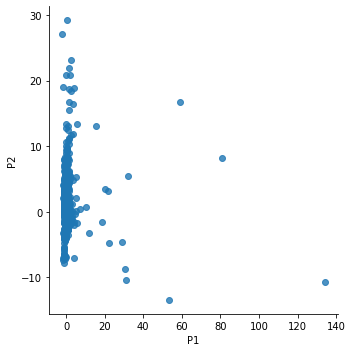

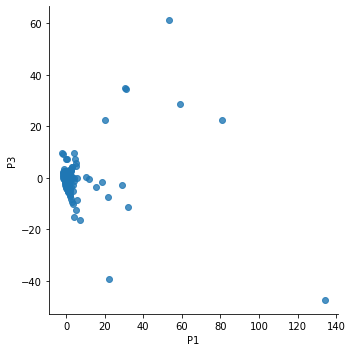

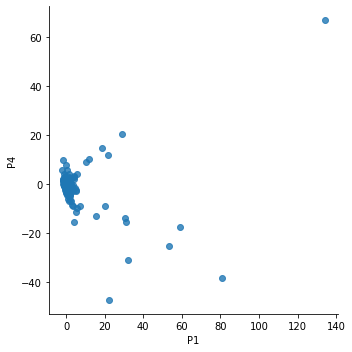

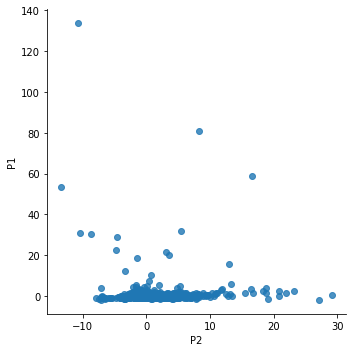

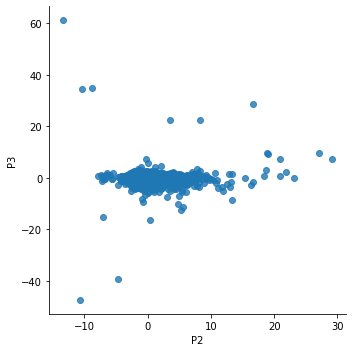

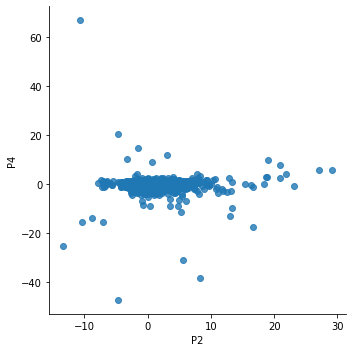

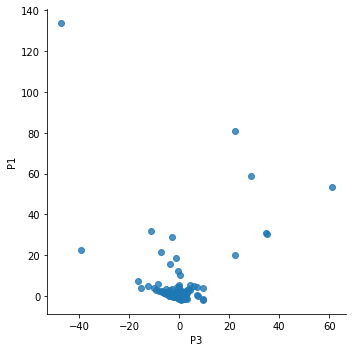

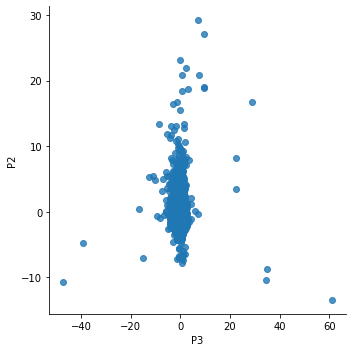

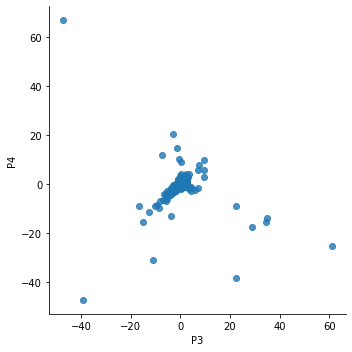

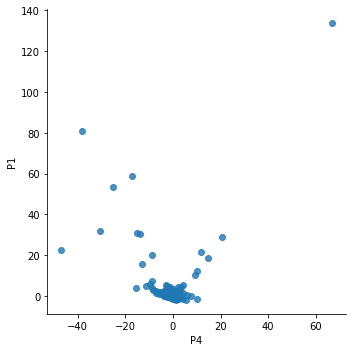

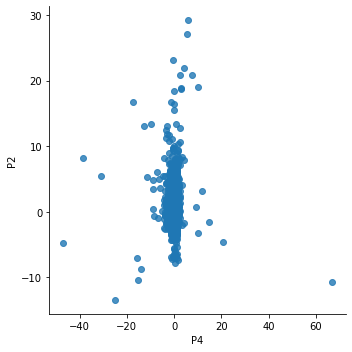

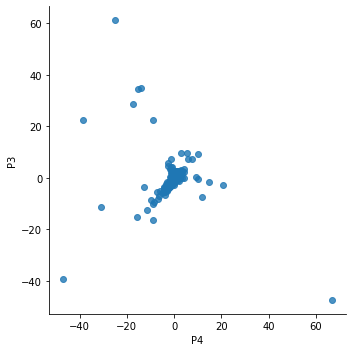

In [78]:
import seaborn as sns                                                           #Graficar las componentes principales
import matplotlib.pyplot as plt

sns.lmplot("P1", "P2", data = xpca, fit_reg = False)
plt.savefig("P1vP2_Cruz_Ramirez_Nicolas.png")

sns.lmplot("P1", "P3", data = xpca, fit_reg = False)
plt.savefig("P1vP3_Cruz_Ramirez_Nicolas.png")

sns.lmplot("P1", "P4", data = xpca, fit_reg = False)
plt.savefig("P1vP4_Cruz_Ramirez_Nicolas.png")

sns.lmplot("P2", "P1", data = xpca, fit_reg = False)
plt.savefig("P2vP1_Cruz_Ramirez_Nicolas.png")

sns.lmplot("P2", "P3", data = xpca, fit_reg = False)
plt.savefig("P2vP3_Cruz_Ramirez_Nicolas.png")

sns.lmplot("P2", "P4", data = xpca, fit_reg = False)
plt.savefig("P2vP4_Cruz_Ramirez_Nicolas.png")

sns.lmplot("P3", "P1", data = xpca, fit_reg = False)
plt.savefig("P3vP1_Cruz_Ramirez_Nicolas.png")

sns.lmplot("P3", "P2", data = xpca, fit_reg = False)
plt.savefig("P3vP2_Cruz_Ramirez_Nicolas.png")

sns.lmplot("P3", "P4", data = xpca, fit_reg = False)
plt.savefig("P3vP4_Cruz_Ramirez_Nicolas.png")

sns.lmplot("P4", "P1", data = xpca, fit_reg = False)
plt.savefig("P4vP1_Cruz_Ramirez_Nicolas.png")

sns.lmplot("P4", "P2", data = xpca, fit_reg = False)
plt.savefig("P4vP2_Cruz_Ramirez_Nicolas.png")

sns.lmplot("P4", "P3", data = xpca, fit_reg = False)
plt.savefig("P4vP3_Cruz_Ramirez_Nicolas.png")

# **3.2 IMPORTANCIA DE VARIABLES CON KBESTSELECTOR**


In [158]:
# Realizar una selección de variables, utilizando selectkbest. Considerar la variable MaxGenU 
# como la variable objetivo. Para este análisis no se considerarán las variables FtotTimeUsed, 
# HtotTimeUsed, y el evento será considerado que el género que utilizó más la bici sea Mujer. 
# Hay que ajustar el selector de variables de igual forma cómo lo vimos en clase, tomando casi 
# todas las variables, descartando las variables mencionadas en el párrafo anterior y cómo 
# variable “y” u objetivo MaxGenU.
# El selector deberá generar la selección de 5 variables. De forma que la salida será un csv con 
# el nombre de las variables originales, pero solamente las 5 variables elegidas por el selector. 

variables_categoricas = ["BiciID","WDr","WDa","CER","CEA","MaxGenU","MostFrequentAgeGroup","MosFrequentTimeGroupR"]              #Seleccionar las variables categoricas
kbestframe1 = TAD.copy()                                                                                                         #Crear una copia de la TAD con todas las variables
def mifuncion34(x):
  if (x == "F"): x = str(1)
  elif (x == "M"): x = str(0)
  return x
kbestframe1["MaxGenU"] = kbestframe1["MaxGenU"].apply(mifuncion34)
kbestframe1.drop(columns=["FtotTimeUsed","HtotTimeUsed"],inplace=True)                                                           #Eliminar las columnas que nos indica el pdf
varsc = kbestframe1.columns[~kbestframe1.columns.isin(variables_categoricas)]                                                    #Seleccionar las variables continuas



from sklearn.preprocessing import MinMaxScaler                                  #Realizar el escalamiento de variables continuas
mm = MinMaxScaler()                                                             #Instanciar el escalador                                                                                
Xc = kbestframe1[varsc].copy()                                                  #Crear una copia con solo las variables continuas                                                                 
Xmn = pd.DataFrame(mm.fit_transform(Xc), columns= [c + "_mn" for c in varsc])   #Realizar el reescalamiento
Xmn

#Agregar columnas categoricas (Excepto variable objetivo) a el dataframe reescalado.                              #No puede trabajar con variables categoricas
for k in ["BiciID","WDr","WDa","CER","CEA","MostFrequentAgeGroup","MosFrequentTimeGroupR"]:
  Xmn[k] = kbestframe1[k]

#Tranformar a string las variables categoricas
for k in ["BiciID","WDr","WDa","CER","CEA","MostFrequentAgeGroup","MosFrequentTimeGroupR"]:
  Xmn[k] = Xmn[k].apply(str)
Xmn

#Definir variable objetivo
tar = "MaxGenU"

#Definimos X, y finales
X = Xmn.copy()
y = kbestframe1[tar]

#Importar la clase Kbest de sklearn          
from sklearn.feature_selection import SelectKBest                               #Solo se puede con variables numericas
sk = SelectKBest(k = 5 )                                                        #Instanciar la clase y seleccionar el numoer de variables de importancia
#Ajustar la clase
sk.fit(X[[c + "_mn" for c in varsc]],y)


#Obtener que variables deben entrar al modelo. Nos indica solo la posicion
sk.get_support()

#Obtener los nombres de las columnas
dict(zip([c + "_mn" for c in varsc],sk.get_support()))                          #Posible solucion sin considerar las variables categoricas
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# #¿Si metemos las variables categoricas pueden cambiar los resultados?           #Muy probablemente si

# #Mismo ejercicio haciendolo con variables categoricas como dummy
# vard = ["WDr","WDa","MostFrequentAgeGroup","MosFrequentTimeGroupR"]             #Usarte todas las categoricas excepto IdBici, CER, CEA ya que tienen demasiadas categorias
# x_dumm = pd.get_dummies(X[vard])
# x_dumm

# #Instanciar la clase
# skdumm = SelectKBest(k = 5)

# #Unir los dos conjuntos de variables, numericas estandarizadas + categoricas dummy
# X = Xmn[[c for c in Xmn if "_mn" in c]].merge(x_dumm, how="inner", left_index=True, right_index=True)

# #Ajustamos la clase
# skdumm.fit(X,y)

# dict(zip(X.columns,skdumm.get_support()))                          #Solucion considerando variables dummy


{'AvgAge_mn': False,
 'AvgTripTime_mn': True,
 'BiciID_mn': False,
 'FavgTimeUsed_mn': True,
 'FmaxTimeUsed_mn': True,
 'HAvgAge_mn': False,
 'HMinAge_mn': False,
 'HModeAge_mn': False,
 'HStdAge_mn': False,
 'HavgTimeUsed_mn': False,
 'HmaxTimeUsed_mn': False,
 'MMaxAge_mn': False,
 'MaxAge_mn': False,
 'MaxTripTime_mn': False,
 'MinAge_mn': True,
 'MinTripTime_mn': True,
 'ModeAge_mn': False,
 'NextDay_mn': False,
 'TimeUsed_mn': False,
 'WAvgAge_mn': False,
 'WMaxAge_mn': False,
 'WMinAge_mn': False,
 'WModeAge_mn': False,
 'WStdAge_mn': False}

# **3.3 Transformación entrópica**

In [251]:
# Columna   #Registros                                                          Nombre_Variable          Tipo de dato                 Conclusion
# x1                                                                            BiciID                    Categorica                  Categorizada como numerica
# x2 #6410                                                                      WDr                       Categorica                 
# x3                                                                            WDa                       Categorica
# x4                                                                            CER                       Categorica                           
# x5                                                                            CEA                       Categorica                 
# x6                                                                            TimeUsed                  Tiempo/Numerica             Categorizada como numerica         
# x7                                                                            AvgTripTime               Tiempo/Numerica             Categorizada como numerica
# x8                                                                            MaxTripTime               Tiempo/Numerica             Categorizada como numerica
# x9                                                                            MinTripTime               Tiempo/Numerica             Categorizada como numerica
# x10                                                                           NextDay                   Numerica                    Categorizada como numerica
# x11                                                                           MaxGenU                   Categorica                      Objetivo
# x12                                                                           FmaxTimeUsed              Tiempo/Numerica             Categorizada como numerica
# x13                                                                           HmaxTimeUsed              Tiempo/Numerica             Categorizada como numerica
# x14                                                                           FavgTimeUsed              Tiempo/Numerica             Categorizada como numerica
# x15                                                                           HavgTimeUsed              Tiempo/Numerica             Categorizada como numerica
# x16                                                                           FtotTimeUsed              Tiempo/Numerica                 No usar estas columnas
# x17                                                                           HtotTimeUsed              Tiempo/Numerica                 No usar estas columnas
# x18                                                                           MaxAge                    Numerica                    Categorizada como numerica
# x19                                                                           MinAge                    Numerica                    Categorizada como numerica
# x20                                                                           AvgAge                    Numerica                    Categorizada como numerica
# x21                                                                           ModeAge                   Numerica                    Categorizada como numerica
# x22                                                                           WMaxAge                   Numerica                    Categorizada como numerica                                   
# x23                                                                           WMinAge                   Numerica                    Categorizada como numerica
# x24                                                                           WAvgAge                   Numerica                    Categorizada como numerica
# x25                                                                           WStdAge                   Numerica                    Categorizada como numerica
# x26                                                                           WModeAge                  Numerica                    Categorizada como numerica
# x27                                                                           MMaxAge                   Numerica                    Categorizada como numerica
# x28                                                                           HMinAge                   Numerica                    Categorizada como numerica
# x29                                                                           HAvgAge                   Numerica                    Categorizada como numerica
# x30                                                                           HStdAge                   Numerica                    Categorizada como numerica
# x31                                                                           HModeAge                  Numerica                    Categorizada como numerica
# x32                                                                           MostFrequentAgeGroup      Categorica
# x33                                                                           MosFrequentTimeGroupR     Categorica

In [348]:
# ENTREGABLE 1: TODAS LAS VARIABLES DISCRETIZADAS (LAS CATEGORICAS LAS DEJE IGUAL Y LAS PASE A STRING)

entframe1 = TAD.copy()                                                            #Obtener el DF
entframe1 = entframe1.drop(columns=["MaxGenU","FtotTimeUsed","HtotTimeUsed"])     #Eliminar columnas especificadas en el PDF

entframe1["BiciID"]       = pd.cut(entframe1["BiciID"]  , bins = 10).astype(str)  #Discretizar las variables numericas
entframe1["TimeUsed"]     = pd.cut(entframe1["TimeUsed"], bins = 10).astype(str)
entframe1["AvgTripTime"]  = pd.cut(entframe1["AvgTripTime"], bins = 10).astype(str)
entframe1["MaxTripTime"]  = pd.cut(entframe1["MaxTripTime"], bins = 10).astype(str)
entframe1["MinTripTime"]  = pd.cut(entframe1["MinTripTime"], bins = 10).astype(str)
entframe1["NextDay"]      = pd.cut(entframe1["NextDay"], bins = 10).astype(str)
entframe1["FmaxTimeUsed"] = pd.cut(entframe1["FmaxTimeUsed"], bins = 10).astype(str)
entframe1["HmaxTimeUsed"] = pd.cut(entframe1["HmaxTimeUsed"], bins = 10).astype(str)
entframe1["FavgTimeUsed"] = pd.cut(entframe1["FavgTimeUsed"], bins = 10).astype(str)
entframe1["HavgTimeUsed"] = pd.cut(entframe1["HavgTimeUsed"], bins = 10).astype(str)
entframe1["MaxAge"]       = pd.cut(entframe1["MaxAge"], bins = 10).astype(str)
entframe1["MinAge"]       = pd.cut(entframe1["MinAge"], bins = 10).astype(str)
entframe1["AvgAge"]       = pd.cut(entframe1["AvgAge"], bins = 10).astype(str)
entframe1["ModeAge"]      = pd.cut(entframe1["ModeAge"], bins = 10).astype(str)
entframe1["WMaxAge"]      = pd.cut(entframe1["WMaxAge"], bins = 10).astype(str)
entframe1["WMinAge"]      = pd.cut(entframe1["WMinAge"], bins = 10).astype(str)
entframe1["WAvgAge"]      = pd.cut(entframe1["WAvgAge"], bins = 10).astype(str)
entframe1["WStdAge"]      = pd.cut(entframe1["WStdAge"], bins = 10).astype(str)
entframe1["WModeAge"]     = pd.cut(entframe1["WModeAge"], bins = 10).astype(str)
entframe1["MMaxAge"]      = pd.cut(entframe1["MMaxAge"], bins = 10).astype(str)
entframe1["HMinAge"]      = pd.cut(entframe1["HMinAge"], bins = 10).astype(str)
entframe1["HAvgAge"]      = pd.cut(entframe1["HAvgAge"], bins = 10).astype(str)
entframe1["HStdAge"]      = pd.cut(entframe1["HStdAge"], bins = 10).astype(str)
entframe1["HModeAge"]     = pd.cut(entframe1["HModeAge"], bins = 10).astype(str)

                                                                                    
entframe1["CER"] = entframe1["CER"].apply(str)                                    #Volver string las variables categoricas
entframe1["CEA"] = entframe1["CEA"].apply(str)
entframe1[["WDr","WDa","CER","CEA","MostFrequentAgeGroup","MosFrequentTimeGroupR"]]
entframe1.to_csv("discretdf_Cruz_Ramirez_Nicolas.csv")
datitos = entframe1.copy()
entframe1

,BiciID,WDr,WDa,CER,CEA,TimeUsed,AvgTripTime,MaxTripTime,MinTripTime,NextDay,FmaxTimeUsed,HmaxTimeUsed,FavgTimeUsed,HavgTimeUsed,MaxAge,MinAge,AvgAge,ModeAge,WMaxAge,WMinAge,WAvgAge,WStdAge,WModeAge,MMaxAge,HMinAge,HAvgAge,HStdAge,HModeAge,MostFrequentAgeGroup,MosFrequentTimeGroupR
0,"(760.436, 2231.4]",Martes,Martes,27,271,"(-20.089, 2017.478]","(-15.219, 1526.887]","(-19.592, 1964.21]","(-15.268, 1526.843]","(6.2, 9.3]","(-15.224, 1526.883]","(-19.592, 1964.21]","(-15.224, 1526.883]","(-10.837, 1088.628]","(74.5, 83.8]","(15.955, 20.5]","(34.75, 38.5]","(27.4, 31.6]","(70.0, 80.2]","(15.97, 19.0]","(32.2, 35.5]","(9.094, 10.629]","(24.4, 27.1]","(73.5, 82.6]","(15.955, 20.5]","(36.15, 39.7]","(10.889, 13.081]","(27.4, 31.6]","(30, 39)",Tarde
1,"(760.436, 2231.4]",Lunes,Lunes,237,266,"(-20.089, 2017.478]","(-15.219, 1526.887]","(-19.592, 1964.21]","(-15.268, 1526.843]","(-0.031, 3.1]","(-15.224, 1526.883]","(-19.592, 1964.21]","(-15.224, 1526.883]","(-10.837, 1088.628]","(65.2, 74.5]","(15.955, 20.5]","(31.0, 34.75]","(23.2, 27.4]","(59.8, 70.0]","(15.97, 19.0]","(32.2, 35.5]","(9.094, 10.629]","(21.7, 24.4]","(64.4, 73.5]","(15.955, 20.5]","(32.6, 36.15]","(8.697, 10.889]","(31.6, 35.8]","(30, 39)",Tarde
2,"(760.436, 2231.4]",Viernes,Viernes,1,1,"(-20.089, 2017.478]","(-15.219, 1526.887]","(-19.592, 1964.21]","(-15.268, 1526.843]","(3.1, 6.2]","(-15.224, 1526.883]","(-19.592, 1964.21]","(-15.224, 1526.883]","(-10.837, 1088.628]","(65.2, 74.5]","(15.955, 20.5]","(34.75, 38.5]","(27.4, 31.6]","(59.8, 70.0]","(15.97, 19.0]","(32.2, 35.5]","(9.094, 10.629]","(24.4, 27.1]","(64.4, 73.5]","(15.955, 20.5]","(36.15, 39.7]","(8.697, 10.889]","(27.4, 31.6]","(30, 39)",Tarde
3,"(760.436, 2231.4]",Viernes,Viernes,64,266,"(-20.089, 2017.478]","(-15.219, 1526.887]","(-19.592, 1964.21]","(-15.268, 1526.843]","(-0.031, 3.1]","(-15.224, 1526.883]","(-19.592, 1964.21]","(-15.224, 1526.883]","(-10.837, 1088.628]","(74.5, 83.8]","(15.955, 20.5]","(34.75, 38.5]","(31.6, 35.8]","(59.8, 70.0]","(15.97, 19.0]","(32.2, 35.5]","(7.558, 9.094]","(24.4, 27.1]","(73.5, 82.6]","(15.955, 20.5]","(36.15, 39.7]","(10.889, 13.081]","(31.6, 35.8]","(30, 39)",Tarde
4,"(760.436, 2231.4]",Jueves,Jueves,165,266,"(-20.089, 2017.478]","(-15.219, 1526.887]","(-19.592, 1964.21]","(-15.268, 1526.843]","(-0.031, 3.1]","(-15.224, 1526.883]","(-19.592, 1964.21]","(-15.224, 1526.883]","(-10.837, 1088.628]","(74.5, 83.8]","(15.955, 20.5]","(34.75, 38.5]","(27.4, 31.6]","(70.0, 80.2]","(15.97, 19.0]","(32.2, 35.5]","(10.629, 12.165]","(24.4, 27.1]","(73.5, 82.6]","(15.955, 20.5]","(36.15, 39.7]","(10.889, 13.081]","(27.4, 31.6]","(30, 39)",Mañana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405,"(13882.6, 15339.0]",Viernes,Viernes,449,266,"(-20.089, 2017.478]","(-15.219, 1526.887]","(-19.592, 1964.21]","(-15.268, 1526.843]","(3.1, 6.2]","(-15.224, 1526.883]","(-19.592, 1964.21]","(-15.224, 1526.883]","(-10.837, 1088.628]","(65.2, 74.5]","(15.955, 20.5]","(34.75, 38.5]","(27.4, 31.6]","(59.8, 70.0]","(19.0, 22.0]","(32.2, 35.5]","(9.094, 10.629]","(27.1, 29.8]","(73.5, 82.6]","(15.955, 20.5]","(32.6, 36.15]","(10.889, 13.081]","(27.4, 31.6]","(20, 29)",Tarde
6406,"(13882.6, 15339.0]",Martes,Miercoles,449,266,"(-20.089, 2017.478]","(-15.219, 1526.887]","(-19.592, 1964.21]","(-15.268, 1526.843]","(-0.031, 3.1]","(-15.224, 1526.883]","(-19.592, 1964.21]","(-15.224, 1526.883]","(-10.837, 1088.628]","(65.2, 74.5]","(15.955, 20.5]","(34.75, 38.5]","(27.4, 31.6]","(59.8, 70.0]","(15.97, 19.0]","(32.2, 35.5]","(9.094, 10.629]","(29.8, 32.5]","(73.5, 82.6]","(15.955, 20.5]","(32.6, 36.15]","(8.697, 10.889]","(27.4, 31.6]","(30, 39)",Tarde
6407,"(13882.6, 15339.0]",Martes,Martes,449,266,"(-20.089, 2017.478]","(-15.219, 1526.887]","(-19.592, 1964.21]","(-15.268, 1526.843]","(-0.031, 3.1]","(-15.224, 1526.883]","(-19.592, 1964.21]","(-15.224, 1526.883]","(-10.837, 1088.628]","(65.2, 74.5]","(15.955, 20.5]","

In [398]:
# PASO 1: DISCRETIZAR VARIABLES CONTINUAS 

variable = "MosFrequentTimeGroupR"                                                                            #Sobre que variable se calculara el WoE y el IV
entframe1 = datitos.copy()                                                                  #Crear una copia de la base del paso anterior
entframe1 = entframe1.merge(TAD[["MaxGenU"]],left_index=True,right_index=True)              #Agregar la variable objetivo al DF
entframe1.loc[entframe1["MaxGenU"]=="F","MaxGenU"] = 1                                      #Cambiamos las categorias de la variable objetivo
entframe1.loc[entframe1["MaxGenU"]=="M","MaxGenU"] = 0
entframe1


entframe1 = entframe1[[variable,"MaxGenU"]]                                                          #Seleccionar solo las columnas a utilizar
entframe1[variable + "_cut"] = entframe1[variable]                                                     
entframe1
entframe1[[variable, variable+"_cut"]]                                                               #Mostrar los nuevos cortes
edades = sorted(entframe1[variable + "_cut"].unique())                                               #Los bins que se crearon a partir de la variable continua
labels = ["Categoria_" + str(k) for k in range(1,len(entframe1[variable + "_cut"].unique())+1)]      #Crear las etiquetas de cada bin
auxd = dict(zip(edades, labels))                                                                     #Creamos el diccionario para mapear las etiquetas
entframe1['nuestra_variable'] = entframe1[variable + '_cut']                                         #Mapeamos el diccionario
entframe1                                                                                            #Solicitamos la visualización de entframe

# PASO 2:
aux = entframe1[['nuestra_variable', 'MaxGenU']].groupby('nuestra_variable').agg(['count', 'sum'])
aux
# PASO 2.2:
aux['evento'] = aux['MaxGenU', 'sum']
aux['no_evento'] = aux['MaxGenU', 'count'] - aux['evento']
aux
# PASO 3:
aux['%evento'] = aux['evento']/aux['evento'].sum()
aux['%no_evento'] = aux['no_evento']/aux['no_evento'].sum()
aux
# PASO 4:
aux = aux.reset_index()
aux
filas = (aux["%evento"]==0)
aux["WoE_mal"] = np.nan
aux.loc[~filas,['WoE_mal']] = aux.loc[~filas,'%no_evento']/aux.loc[~filas,'%evento']
aux.loc[filas,['WoE_mal']] = 0
aux
aux.columns = aux.columns.map(''.join)                                                             #Remover el multi-index
aux["WoE"] = np.nan
for i in range(len(aux)):
  aux.loc[i,"WoE"] = np.log(aux["WoE_mal"][i])
aux['IV'] = (aux['%no_evento'] - aux['%evento'])*aux['WoE']
aux
filas = ((aux["IV"]==np.inf) | (aux["IV"]==-np.inf) )
aux.loc[filas,['IV']] = 0
print("IV de la variable: " + str(variable) + " es " + str(aux['IV'].replace(np.inf, 0).sum()))
aux

IV de la variable: MosFrequentTimeGroupR es 2.9890728378840103


,nuestra_variable,MaxGenUcount,MaxGenUsum,evento,no_evento,%evento,%no_evento,WoE_mal,WoE,IV
0,Mañana,56,2,2,54,0.4,0.008431,0.021077,-3.859559,1.511284
1,Noche,12,1,1,11,0.2,0.001717,0.008587,-4.757501,0.94333
2,Tarde,6342,2,2,6340,0.4,0.989852,2.474629,0.906091,0.534459


In [361]:
datitos.columns

Index(['BiciID', 'WDr', 'WDa', 'CER', 'CEA', 'TimeUsed', 'AvgTripTime',
       'MaxTripTime', 'MinTripTime', 'NextDay', 'FmaxTimeUsed', 'HmaxTimeUsed',
       'FavgTimeUsed', 'HavgTimeUsed', 'MaxAge', 'MinAge', 'AvgAge', 'ModeAge',
       'WMaxAge', 'WMinAge', 'WAvgAge', 'WStdAge', 'WModeAge', 'MMaxAge',
       'HMinAge', 'HAvgAge', 'HStdAge', 'HModeAge', 'MostFrequentAgeGroup',
       'MosFrequentTimeGroupR'],
      dtype='object')